How many rows and columns?
What is the correlation between the variables and the price? (Why might that be?)
How are variables correlated to each other? (Why?)
Which variables have the greatest influence on the price?
Which variables have the least influence on the price?
How many qualitative and quantitative variables are there? How would you transform these values into numerical values?
Percentage of missing values per column?

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("..\..\\assets\cleaned_data.csv")
df.head()

,id,status_build,frontages,surroundings,living_area,liv_room_surf,kitchen_type,bedrooms,bathrooms,showers,...,swimming_pool,energy_class,heating,price,flood_zone,garden,zipcode,building_type,building_subtype,municipality
0,10567498,2.0,3.0,Isolated,212.0,60.0,1.0,4.0,2.0,2.0,...,0.0,F,Gas,730000.0,NaN,0.0,1050,apartment,apartment,ixelles
1,10567435,2.0,2.0,NaN,258.0,NaN,3.0,2.0,1.0,NaN,...,NaN,A,Gas,775000.0,Non flood zone,0.0,3020,apartment,loft,herent
2,10557731,2.0,4.0,Urban,94.0,34.0,1.0,2.0,1.0,1.0,...,0.0,E,Gas,99000.0,Non flood zone,0.0,4820,apartment,apartment,dison
3,10567501,2.0,3.0,Isolated,212.0,60.0,1.0,4.0,2.0,2.0,...,0.0,F,Gas,730000.0,NaN,0.0,1060,apartment,apartment,saint-gilles
4,10557727,2.0,2.0,Isolated,111.0,30.0,1.0,3.0,1.0,1.0,...,0.0,B,Gas,219000.0,Non flood zone,200.0,4680,apartment,apartment,oupeye


How many rows and columns?

In [3]:
df.shape

(9341, 25)

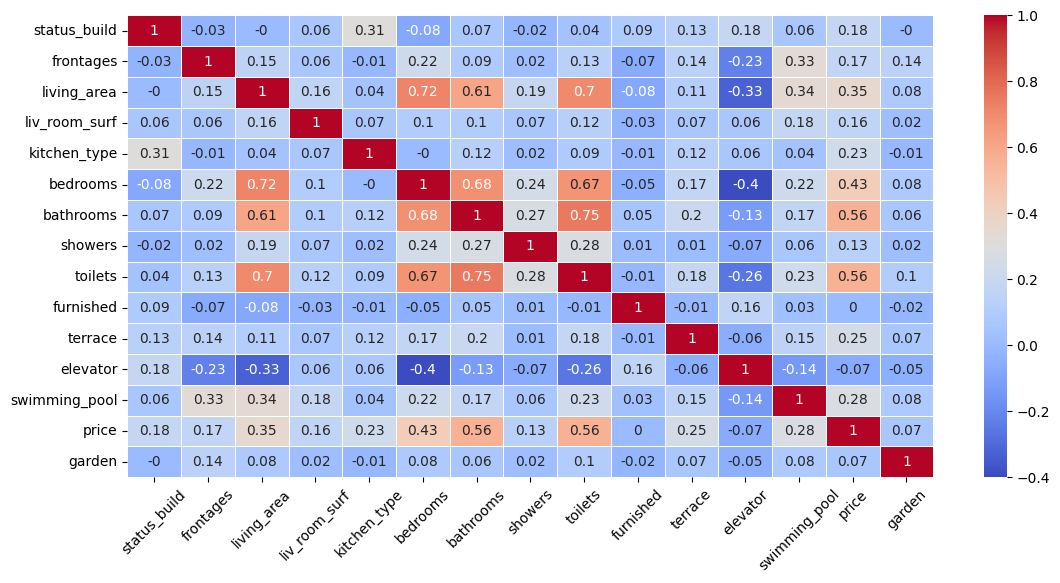

In [10]:
import seaborn as sns

correlation = df.drop(columns=['id', 'surroundings', 'energy_class','basement', 'heating', 'flood_zone', 'zipcode', 'building_type', 'building_subtype', 'municipality']) 
correlation_df = correlation.corr().round(2)

plt.figure(figsize=(13, 6))
sns.heatmap(correlation_df, vmax=1, annot=True, linewidths=.7, cmap="coolwarm")
plt.xticks(rotation=45)
plt.show()

What is the correlation between the variables and the price? (Why might that be?)

In [7]:
correlation = df.drop(columns=['id', 'surroundings', 'energy_class','basement', 'heating', 'flood_zone', 'zipcode', 'building_type', 'building_subtype', 'municipality']) 
correlation_df = correlation.corr().round(2)
correlation_df["price"]

status_build     0.18
frontages        0.17
living_area      0.35
liv_room_surf    0.16
kitchen_type     0.23
bedrooms         0.43
bathrooms        0.56
showers          0.13
toilets          0.56
furnished        0.00
terrace          0.25
elevator        -0.07
swimming_pool    0.28
price            1.00
garden           0.07
Name: price, dtype: float64

Which variables have the greatest influence on the price?


Percentage of missing values per column?

In [13]:
missing_values = df.isnull().mean().round(2)
missing_values

id                  0.00
status_build        0.11
frontages           0.18
surroundings        0.57
living_area         0.01
liv_room_surf       0.39
kitchen_type        0.11
bedrooms            0.02
bathrooms           0.13
showers             0.66
toilets             0.09
basement            0.52
furnished           0.46
terrace             0.00
elevator            0.45
swimming_pool       0.58
energy_class        0.00
heating             0.13
price               0.00
flood_zone          0.45
garden              0.00
zipcode             0.00
building_type       0.00
building_subtype    0.00
municipality        0.00
dtype: float64